# Proyecto 3: Simulación de fenómenos utilizando ecuaciones diferenciales

## Integrantes:
> - Ignacio Maximiliano Jiménez Ramírez
> - Daniel Sánchez López

---

## Objetivos del proyecto:

**Objetivo General:** Mediante el uso de ecuaciones diferenciales se pueden modelar y representar fenómenos de distintas áreas de aplicación. Como se vió en clase "*los fenómenos que se estudian en ingeniería, son cambiantes (evoluciona) en el tiempo. De modo que las descripciones (modelos) de como cambian las cosas en el tiempo terminan como una ecuación diferencial*" (01 Intro - ED, 2022). 


Las ecuaiones diferenciales se pueden utilizar para representar fenómenos, gracias a los ejemplos proporcionados los cuales son; la población de conjeos, el péndulo simple, el modelo de ahorro, el oscilador armónico. Se puede obtener la solución analítica de la ecuación, que consiste en graficar varias curvas para la solición analítica dada, y la solución numérica, que se obtiene resolviendo la ecuación difenrencial con `solve_ivp` o con `odeint`.


En este proyecto se propondrán dos fenómenos para ejemplificar la basta aplicación de las ecuaciones diferenciales. El primer fenómeno es la población de una bacteria que se encuentra dentro de un frasco. El segundo es una inversión que consiste de una inversión en la cual quiere retirar cada año una cantidad del capital para ver el comportamiento de la inversión. Graficar las soluciones obtenidas de las ecuaciones diferenciales.


**Objetivos específicos:** Utilizar ecuaciones diferenciales para simular cada fenómeno. Para lograr este objetivo se utlizarán las siguientes herramientas:
> - De la librería de `scipy.integrate` utilizar la función de `solve_ivp` y `odeint`.
> - Utilizar la librería de `numpy` para el manejo y el arreglo de datos numéricos.
> - Utilizar la librería de `matplotlib` para graficar los resultados obtenidos.
> - Un modelo representativo de la población de bacterias, escrito como una ecuación diferencial.
> - Un modelo representativo de inversión, escrito como una ecuación diferencial.
> - Utilizar ciclos `for` para resolver y graficar la ecuación diferencial del modelo de inversión.

---

## Modelo que representa el problema (Población de bacterias)

Como se estipuló en los objetivos del proyecto, se proponen dos fenómenos, ambas con sus respectivas ecuaciones diferenciales que describen los fenómenos y su comportamiento a través del tiempo. Se realizaron investigaciones para encontrar las ecuaciones diferenciales.

La ecuación diferencial que describe la población de bacteria dentro de un frasco es la siguiente:

Teniendo en cuenta:
> - Tasa de natalidad: $bx$
> - Tasa de mortalidad: $px^2$

Entonces la tasa total de cambio de la población de bacterias es:

$$ x(t) = bx - px^2 $$

$$ \frac{dx}{dt} = bx - px^2 $$


Donde $x$ es la cantidad de bacterias dentro del frasco. Nótese que $ x = \frac{dx}{dt} $

En la simulación se determinan las condiciones iniciales $b=1$ (hora, eq timelapse o tspan) y $p=0.5$ (bacteria que nace por hora). 

(Hans-Petter Halvorsen, s.f.)


---

## Simulación

A continuación se simulará el número de bacterias en el frasco después de 1 hora, asumiendo que inicialmente hay 100 bacterias presentes.

Se importan las librerías que se van a utilizar para resolver el proyecto.

In [1]:
from scipy.integrate import solve_ivp, odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Se definen los parámetros o condiciones iniciales:
> - Como ya se estipuló, la simulación será dentro de un tspan o lapso de tiempo de una hora. $[0, 1]$
> - Se tienen 100 bacterias dentro del frasco inicialmente. $x_0 = [100] $

In [11]:
# Solución de la simulación de la población de bacterias

inicio = 0
fin = 1
x0 = [100]
tspan = np.array([0, 1])

Se escribe como función de python la ecuación diferencial descrita que representa el comportamiento de población de bacteria. Incluyendo los parámetros iniciales.
- $b=1$
- $p=0.5$

In [10]:
# Definimos la ecuación que representa la población de bacteria

def bacteria(t, x) :
    b = 1
    p = 0.5
    dbacteria = b * x - p * x**2
    return dbacteria

Se resuelve la ecuación diferencial con `solve_ivp`

In [160]:
# Resolvemos con solve_ivp

solivp = solve_ivp(bacteria, tspan, x0)

Se resuelve la ecuación diferencial con `odeint`

In [5]:
# Resolvemos con odeint

tstart = 0
tstop = 1
increment = 0.01
x_0 = 100
t = np.arange(tstart, tstop+increment, increment)
x = odeint(bacteria, x_0, t)

## Visualización de los resultados

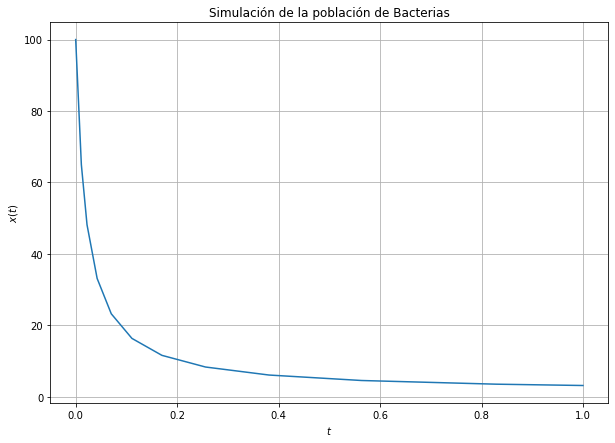

In [166]:
# Graficamos la solución con solve_ivp

plt.figure(figsize=(10, 7))
plt.plot(solivp.t, solivp.y[0,:])
plt.title('Simulación de la población de Bacterias')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid()

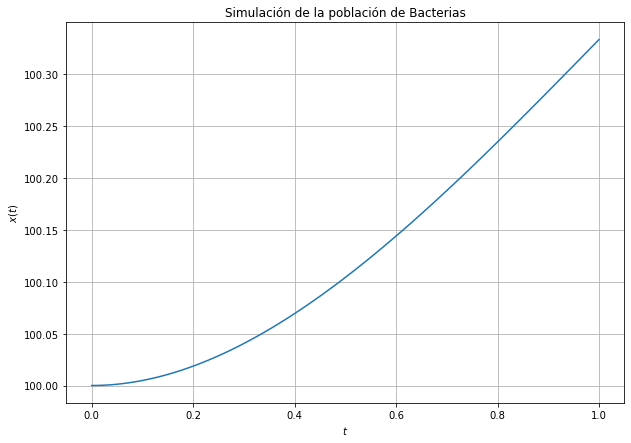

In [6]:
plt.figure(figsize=(10, 7))
plt.plot(t, x)
plt.title('Simulación de la población de Bacterias')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid()

La solución utilizando `odeint` es algo ambigua, ya que la población con este método aumenta, a pesar de que se utilizaron las mismas condiciones iniciales y la misma función que describe la ecuación diferencial propuesta. Puede que haya un error con alguún caracter o que haya un error al hacer llamar la función `odeint`. No se ha podido corregir este error.

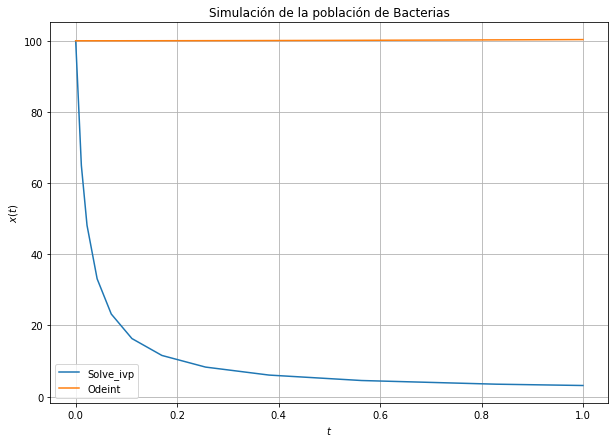

In [168]:
# Comparando las diferentes soluciones

plt.figure(figsize=(10, 7))
plt.plot(solivp.t, solivp.y[0,:], label = 'Solve_ivp')
plt.plot(t, solodeint, label = 'Odeint')
plt.title('Simulación de la población de Bacterias')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.legend(loc = 'best')
plt.grid()

Ahora, puede que haya un punto de inflexión con la derivada de la ecuación diferencial $ \frac{dx}{dt} = bx - px^2 $, ya que un argumento o variable está elevada al cuadrado, entonces se va a incrementar el lapso de tiempo para ver si la población de bacterias aumenta al llegar a un punto de inflexión, o si la población sigue disminuyendo.

In [15]:
tspan22 = np.array([0, 2])
sol2a = solve_ivp(bacteria, tspan22, [200])

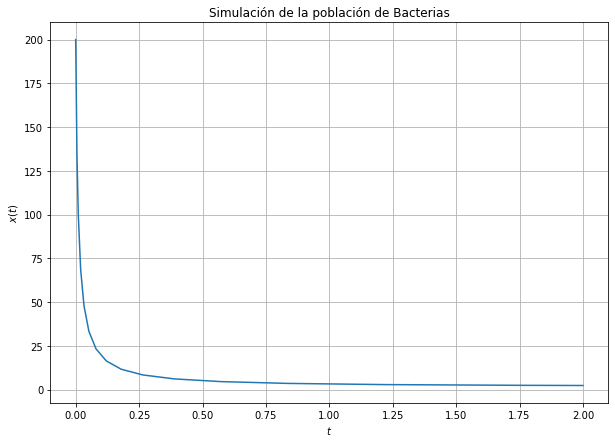

In [16]:

plt.figure(figsize=(10, 7))
plt.plot(sol2a.t, sol2a.y[0,:])
plt.title('Simulación de la población de Bacterias')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid()

## Conclusiones (Población de bacterias)

Después de resolver la ecuación diferencial, y graficar los resultados obtenidos, se observa que la población de bacterias sigue disminuyendo. Entonces a lo mejor a pesar de que se propongan más bacterias inicialmente, o un lapso de tiempo mayor, más bacterias que nacen por hora, la solución será similar a la obtenida.

El por qué de esto puede ser que el modelo no considera elementos que necesitan las bacterias para vivir o reproducirse, puede ser que dentro del contexto de este problema, el frasco esté cerrado y que por lo tanto, el oxígeno sea limitado y que se acabe dentro de la hora. Entonces puede que la fortaleza de la ecuación, y que los datos o parámetros de entrada no sean suficientes para hacer una simulación verídica o similar a la realidad.

---

## Modelo que representa el problema (Inversión)

Se supone que hay una fortuna $F$ invertida con una tasa de interés anual de $p$ por ciento. Todos los años se piensa consumir o retirar una cantidad $c_n$, donde $n$ cuenta años, y se quiere calcular la fortuna $x_n$ en el año $n$.  al razonar que la fortuna en el año $n$ es igual a la fortuna en el año $n − 1$ más el interés menos el cantidad que se gasta en el año $n−1$. Se tiene que el problema se puede formular como un sistema de ecuaciones diferenciales.

En el caso más simple, $c_n$ es constante, pero la inflación exige que $c_n$ aumente. Al resolver este problema, se supone que $c_n$ debe crecer con una tasa de $I$ por ciento por año, y en el primer año se quiere consumir $q$ por ciento del primer año interés.

$$ x_n = \frac{dx}{dt} = x_{n-1} + \frac{p}{100}x_{n-1} - c_{n-1} $$

$$ c_n = \frac{dc}{dt} = c_{n-1} + \frac{I}{100}c_{n-1} $$

con condiciones iniciales $x_0 = F$ y $c_0 = (\frac{pF}{100})(\frac{q}{100}) = \frac{pFq}{10000}$

Esto es un sistema acoplado de dos ecuaciones diferenciales. Creamos dos arreglos $x$ y $c$, inicializando $x[0]$ y $c[0]$ a las condiciones iniciales dadas, y luego actualizan $x[n]$ y $c[n]$ dentro del ciclo.

(Joakim Sundnes, s.f.)

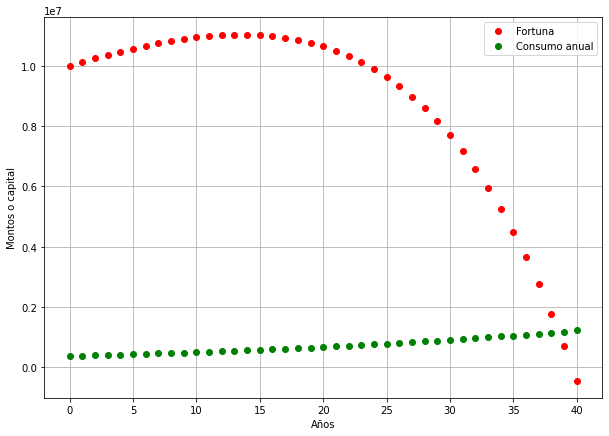

In [17]:
F = 10**7      # capital inicial
p = 5          # tasa de interés
I = 3          # Cantidad que se quiere consumir con I tasa de crecimiento por año
q = 75         # Porcentaje que se quiere consumir de la fortuna
N = 40         # número de años que dura la inversión

tspan = range(N+1)
x = np.zeros( len(tspan) )
c = np.zeros_like(x)
x[0] = F
c[0] = q*p*F*10**-4

for n in tspan[1:] :
    x[n] = x[n-1] + (p/100.0)*x[n-1] - c[n-1]
    c[n] = c[n-1] + (I/100.0)*c[n-1]
    
plt.figure(figsize=(10, 7))
plt.plot(tspan, x, 'ro', label = 'Fortuna')
plt.plot(tspan, c, 'go', label = 'Consumo anual')
plt.xlabel('Años')
plt.ylabel('Montos o capital')
plt.legend(loc = 'best')
plt.grid()

Utilizando el mismo modelo para simular una inversión en UDIBONOS. Los udis son inversiones que fijan su tasa interés a la tasa de inflación actual, por lo que protegen el capital de la inversión. El plazo mínimo de inversión son de 3 años, y el plazo máximo es de 30 años, por lo que se simula una inversión con consumo cada 3 años. (Banxico, 2022), (BBVA, 2022).

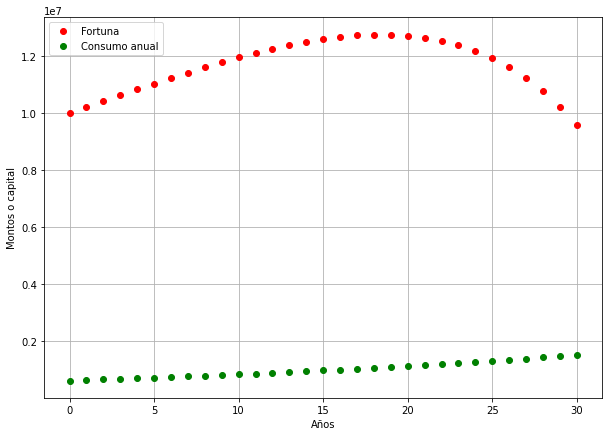

In [19]:
F = 10**7      # capital inicial
p = 8.41       # tasa de inflación actual
I = 3          # Cantidad que se quiere consumir con I tasa de crecimiento por año
q = 75         # Porcentaje que se quiere consumir de la fortuna
N = 30         # número de años que dura la inversión

tspan = range(N+1)
x = np.zeros( len(tspan) )
c = np.zeros_like(x)
x[0] = F
c[0] = q*p*F*10**-4

for n in tspan[1:] :
    x[n] = x[n-1] + (p/100.0)*x[n-1] - c[n-1]
    c[n] = c[n-1] + (I/100.0)*c[n-1]
    
plt.figure(figsize=(10, 7))
plt.plot(tspan, x, 'ro', label = 'Fortuna')
plt.plot(tspan, c, 'go', label = 'Consumo anual')
plt.xlabel('Años')
plt.ylabel('Montos o capital')
plt.legend(loc = 'best')
plt.grid()

A continuación se simula una inversión en CETES. Los cetes son certificados de la tesorería, equivalen a los Treasuries o bonos del tesoro de Estados Unidos. La tasa actual de CETES es de 9.68% y el plazo de inversión más largo es de 1 año. Esta simulación supone que cada año se obtiene la ganancia de la inversión, se consume una cantidad de esta fortuna y se reinvierte el capital a un año. Este ciclo se hará por 20 años (Banxico, 2022).

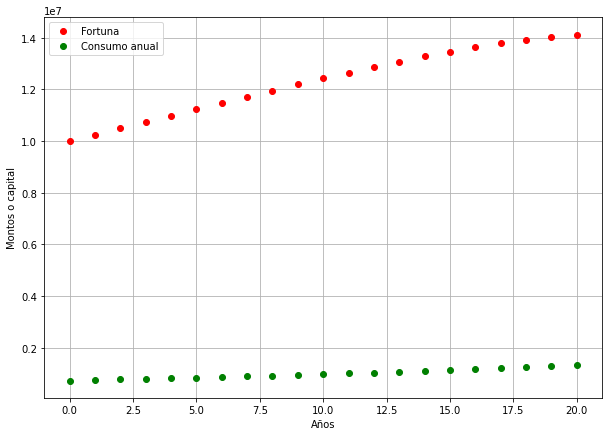

In [20]:
F = 10**7      # capital inicial
p = 9.68       # tasa de cetes actual
I = 3          # Cantidad que se quiere consumir con I tasa de crecimiento por año
q = 75         # Porcentaje que se quiere consumir de la fortuna
N = 20         # número de años que dura la inversión

tspan = range(N+1)
x = np.zeros( len(tspan) )
c = np.zeros_like(x)
x[0] = F
c[0] = q*p*F*10**-4

for n in tspan[1:] :
    x[n] = x[n-1] + (p/100.0)*x[n-1] - c[n-1]
    c[n] = c[n-1] + (I/100.0)*c[n-1]
    
plt.figure(figsize=(10, 7))
plt.plot(tspan, x, 'ro', label = 'Fortuna')
plt.plot(tspan, c, 'go', label = 'Consumo anual')
plt.xlabel('Años')
plt.ylabel('Montos o capital')
plt.legend(loc = 'best')
plt.grid()

## Conclusiones

Se observa que las inversiones que duran más de 20 años empiezan a generar pérdidas con respecto al año anterior. En el primer ejemplo, que se utilizó un lapso de tiempo de 40 años, llegando al final del lapso, la fortuna coincidía con el consumo, por lo que se puede deducir que este modelo o este sistema de ecuaciones diferenciales genera proyecciones para cuando la ganancia neta llegue a ser cero.

Esto puede ser útil para inversionistas para determinar en base a la inversión que deseen realizar, el punto en el que la ganancia es máxima, para en ese momento retirar la inversión, y buscar nuevas opciones para invertir, de esta manera minimizando las pérdidas. Sin embargo cuando al mercado de acciones o a la bolsa de valores se refiere, es muy difícil crear un modelo representativo de inversión, ya que hay factores externos a estos mercados que pueden afectar o cambiar la situación.

Por lo que, a grandes rasgos, se concluye que, mientras más datos o situaciones se consideren al momento de plantear los modelos o las ecuaciones diferenciales que expliquen el comportamiento de los fenómenos con el paso del tiempo, y los parámetros de entrada y las condiciones iniciales que se tengan en cuenta, y la calidad de éstos, mejor será la predicción o las simulaciones de los eventos o fenómenos de estudio.

---

## Referencias:

> - BBVA. (2022, 1 diciembre). ¿Qué son los udibonos?. Obtenido de. https://www.bbva.mx/educacion-financiera/u/udibonos.html
> - Banxico. (2022, 1 de diciembre). Tasa de inflación actual. Obtenido de https://www.banxico.org.mx/
> - Banxico. (2022, 1 de diciembre). Tasa de CETES actual. Obtenido de https://www.banxico.org.mx/
> - Joakim Sundnes. (2022, 30 de noviembre). Solving Ordinary Differential Equations in Python
> - Hans-Petter Halvorsen. (2022, 30 de noviembre). Differential Equations in Python